Plan:
1. Angelas Code in meinen übersetzen
2. aus Angelas Code alle möglichen Mutationen rausschreiben, aber nur einmal
2. --> Liste mit allen vorkommenden Mutationen
3. Funktion schreiben, die für jede dieser (einzeln!) alle Sequenzen raussucht in der diese vorkommt
4. --> ein dataframe, mit mutation als spaltenname und allen sequenzen wo es drin vorkommt als Reihen drunter und noch einer Spalte mit mutcount dahinter, pro Mutation werden zwei Spalten an den dataframe angehängt
5. (dadurch können Reihen spezifisch nach mutcount angeprochen werden)
6. innerhalb einer Mutationsspalte, alle mit dem selben mutcount: fscore vergleich : Varianz der Werte als Maß für impact
-> je unwichtiger die Mutation, desto weniger macht sie was beim fscore, desto weniger sollten sich die Werte unterscheiden, desto kleiner sollte die Varianz sein

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

In [3]:
# Datensatz einlesen
original_dms_data = pd.read_csv('/Users/liza/Desktop/Bioinfo Project/DMS_data/GFP_AEQVI_Sarkisyan_2016.csv')
# split first column of df into multiple columns
original_dms_data_col = original_dms_data
only_mutants = original_dms_data["mutant"].to_frame()
original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)
original_dms_data_col.head()


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_73848/404050330.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)


,mutant,mutated_sequence,DMS_score,DMS_score_bin,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R:V55A:Q94R:A110T:D117G:M153K:D216A,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.301030,0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q:V16A:I167T:L195Q,MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.137350,1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q:Y143C:N164D:S205P:A227T,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.553913,0,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q:Y143N:V193A,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.404237,1,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.738586,1,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Dataframe erstellen aus den Spalten: (WORKING_DATAFRAME)
- Mutationsanzahl aus df_mutation_counts
- fscore aus original_dms_data_col
- m1 bis b11 aus original_dms_data_col

In [4]:
# zählen wieviele Mutationen jede Sequenz hat
list_mut_count_in_progress = []
for i in range(len(original_dms_data['mutant'])):
    list_mut_count_in_progress.append(original_dms_data['mutant'].iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [5]:
#zusammenfügen
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#alle Spalten löschen die stören
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)
working_dataframe.head()

,DMS_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,mut_count
0,1.301030,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None,7
1,3.137350,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None,4
2,1.553913,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None,5
3,3.404237,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None,3
4,3.738586,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [6]:
#alle möglichen Mutationen rausschreiben in den Spalten
from pandas import unique
working_dataframe_only_ms = working_dataframe.loc[:, ["m1", "m2", "m3", 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']]
working_dataframe_only_ms.head()


,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None


1. alle Werte des DataFrames mit values.flatten() in eine eindimensionale Liste umgewandeln
2. tolist() verwendet, um die Liste in eine normale Python-Liste umzuwandeln
3.  Liste in ein Set umgewandeln (nur eindeutige Elemente)
4. set zurück in Liste

In [46]:
all_possible_mutations = working_dataframe_only_ms.values.flatten().tolist()
all_possible_mutations = list(set(all_possible_mutations))
#hat einen none Wert, weil der auch ein Wert in der Liste ist -> wegmachen
while None in all_possible_mutations:
    all_possible_mutations.remove(None)


0


In [8]:
only_mutants_list = only_mutants['mutant']
only_mutants_list

0        K3R:V55A:Q94R:A110T:D117G:M153K:D216A
1                         K3Q:V16A:I167T:L195Q
2                  K3Q:Y143C:N164D:S205P:A227T
3                              K3Q:Y143N:V193A
4                                          K3R
                         ...                  
51709                                    Y237N
51710                                    Y237C
51711                                    Y237D
51712                                    Y237F
51713                                    Y237H
Name: mutant, Length: 51714, dtype: object

In [9]:
resultingg_mutss = pd.DataFrame()
substring = 'V193A'

# Boolianischen Wert ausgeben, ob der Substring in einer Zeile existiert
resultingg_mutss['V193A'] = pd.DataFrame(only_mutants['mutant'].apply(lambda x: substring in x))

print(resultingg_mutss)

       V193A
0      False
1      False
2      False
3       True
4      False
...      ...
51709  False
51710  False
51711  False
51712  False
51713  False

[51714 rows x 1 columns]


In [47]:
list_of_dfs = []

# For-Loop zum Erstellen und Hinzufügen eines neuen Columns in jedem Durchlauf
for i in all_possible_mutations:
    new_column_name = f'{i}'
    new_column_values = [only_mutants_list.str.contains(i, regex= False)]
    new_df = pd.DataFrame({new_column_name: new_column_values})
    new_df_exploded = new_df.explode(new_column_name)
    list_of_dfs.append(new_df_exploded)

# Verketten der DataFrames in der Liste
result_how_often = pd.concat(list_of_dfs, axis=1)
result_how_often = result_how_often.reset_index(drop=True)


der Dataframe ist nur SEHR groß und lädt nirgendwo komplett, aber ich habe einzelne Werte kontrolliert und die stimmen
-> hoffentlich stimmt er komplett, jetzt kann man damit weiterarbeiten
TESTS: (mit Original_csv abstimmen)

In [48]:
cell_value = result_how_often.at[17, 'H77L']
print(cell_value)

True


In [49]:
matching_indexes = result_how_often.loc[result_how_often["H77L"] == True].index

# Ausgabe der übereinstimmenden Zeilenindizes
print(matching_indexes)
#soll: 244 (mit Suchfunktion in Excel abgestimmt :) )

Int64Index([   17,   515,   717,   768,   993,  1481,  1490,  2088,  2820,
             2821,
            ...
            33992, 33993, 34034, 34035, 34036, 34037, 34079, 34080, 34081,
            34082],
           dtype='int64', length=244)


NEXT PART: an einer Mutation (H77L)
1. alle Zeilenindexes wo true steht in der einen Spalte ausgeben lassen yes
2. diesleben Zeilen aus der Originaltabelle rausholen lassen yes
3. mit Mutationscount matchen (working_dataframe) yes
4. alle fscores von den Sequenzen mit vier Mutationen ausgeben lassen yes
5. -> Verteilung -> Varianz yes

In [38]:
# dataframe aus original machen der nur mutcount und fscore hat
count_fscore_frame = working_dataframe[['DMS_score', 'mut_count']]
count_fscore_frame

,DMS_score,mut_count
0,1.301030,7
1,3.137350,4
2,1.553913,5
3,3.404237,3
4,3.738586,1
...,...,...
51709,3.809468,1
51710,3.760217,1
51711,3.754101,1
51712,3.673173,1


In [50]:
K166Q_count_fscore = count_fscore_frame.loc[result_how_often['K166Q'] == True]
fscore_2_K166Q = K166Q_count_fscore['DMS_score'].loc[K166Q_count_fscore['mut_count'] == 2]
varianz_K166Q = fscore_2_K166Q.var()
varianz_K166Q

0.015426224360537455

In [51]:
#vergleich mit einer anderen Mutation
K3R_count_fscore = count_fscore_frame.loc[result_how_often['K3R'] == True]
fscore_2_K3R = K3R_count_fscore['DMS_score'].loc[K3R_count_fscore['mut_count'] == 2]
varianz_K3R = fscore_2_K3R.var()
varianz_K3R

0.2736357484727858

--> klappt: anscheinend ist die K166Q Mutation eher wichtig als die K3R -> passt zu den Angaben im paper

NOW: auf alle Anwenden
1. immer alle mit gleichem mutcount zusammen und alle Mutationen aufzählen yes
2. !! irgendwie berücksichtigen wie viele Werte es für diesen count gibt !! -> ab welchem Wert macht es Sinn? yes
3. (vielleicht erstmal Graph mit den Varianzen gegen die ANzahl der Werte?) yes


In [87]:
variance_per_mutant_2_list = []

for i in all_possible_mutations:
    mut_count_fscore_2 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_2_mut = mut_count_fscore_2['DMS_score'].loc[mut_count_fscore_2['mut_count'] == 2]
    varianz_mut_2 = fscore_2_mut.var()
    variance_per_mutant_2_list.append(varianz_mut_2)

variance_per_mutant_2_series = pd.Series(variance_per_mutant_2_list, index=all_possible_mutations)
variance_per_mutant_2_df = variance_per_mutant_2_series.to_frame()

print(variance_per_mutant_2_df)

              0
T59P   0.000008
D234T       NaN
E5V    0.143128
F223S  0.170454
M218V  0.268366
...         ...
Y200P       NaN
N164V       NaN
L60R   0.009905
D173N  0.697363
G20C        NaN

[1810 rows x 1 columns]


In [88]:
#rausfinden wie viele Daten wir jeweils haben zum berechnen
how_many_for_variance_2 = []

for i in all_possible_mutations:
    mut_count_fscore_2 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_2_mut = mut_count_fscore_2['DMS_score'].loc[mut_count_fscore_2['mut_count'] == 2]
    wie_viel_jeweils_2 = len(fscore_2_mut)
    how_many_for_variance_2.append(wie_viel_jeweils_2)

how_many_for_variance_2 = pd.Series(how_many_for_variance_2, index=all_possible_mutations)
how_many_for_variance_2_df = how_many_for_variance_2.to_frame()

print(how_many_for_variance_2_df)


        0
T59P    2
D234T   0
E5V    44
F223S  87
M218V  49
...    ..
Y200P   0
N164V   0
L60R    2
D173N   8
G20C    1

[1810 rows x 1 columns]


In [90]:
how_many_AND_variance_df_2 = pd.concat([how_many_for_variance_2_df, variance_per_mutant_2_df], axis = 1)
how_many_AND_variance_df_2.columns = ['Anzahl benutzter Werte', 'Varianz']
how_many_AND_variance_df_2 = how_many_AND_variance_df_2.dropna()
how_many_AND_variance_df_2

,Anzahl benutzter Werte,Varianz
T59P,2,0.000008
E5V,44,0.143128
F223S,87,0.170454
M218V,49,0.268366
K158M,29,0.019774
...,...,...
N135D,100,0.065731
H217L,7,0.020450
C48F,3,0.000003
L60R,2,0.009905


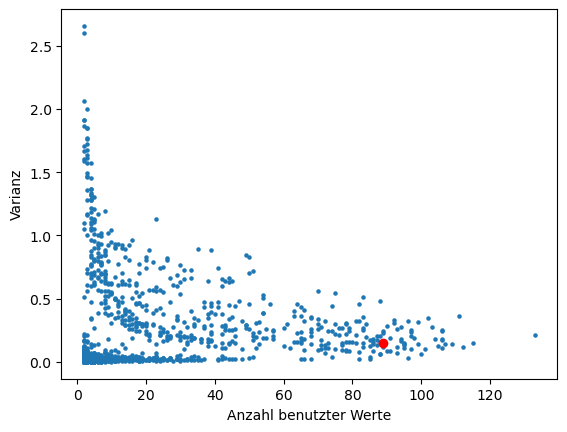

In [91]:
import matplotlib.pyplot as plt
#scatter plot erstellen, mit benennungen
plt.scatter(how_many_AND_variance_df_2['Anzahl benutzter Werte'],how_many_AND_variance_df_2['Varianz'], s = 5 )
plt.xlabel('Anzahl benutzter Werte')
plt.ylabel('Varianz')
#die angeblich highest gerankte mut in rot färben
plt.scatter(how_many_AND_variance_df_2['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df_2['Varianz']['V163A'], c='red')
# Diagramm anzeigen
plt.show()

--> die Werte wichtig mit hoher Anzahl an benutzter Werte und mit niedriger Varianz

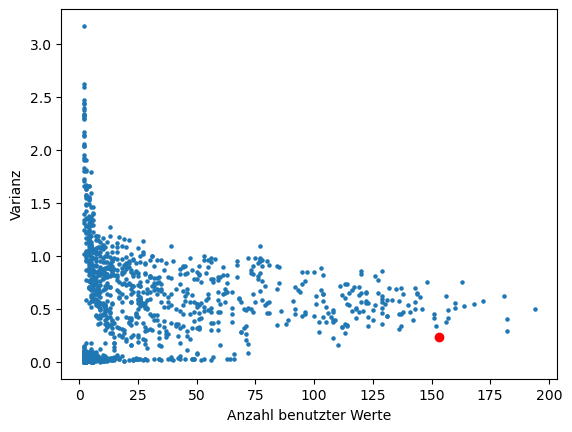

In [93]:
#für 3
#nocmal für 4 muts

variance_per_mutant_3_list = []

for i in all_possible_mutations:
    mut_count_fscore_3 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_3_mut = mut_count_fscore_3['DMS_score'].loc[mut_count_fscore_3['mut_count'] == 3]
    varianz_mut_3 = fscore_3_mut.var()
    variance_per_mutant_3_list.append(varianz_mut_3)

variance_per_mutant_3_series = pd.Series(variance_per_mutant_3_list, index=all_possible_mutations)
variance_per_mutant_3_df = variance_per_mutant_3_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
how_many_for_variance_3 = []

for i in all_possible_mutations:
    mut_count_fscore_3 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_3_mut = mut_count_fscore_3['DMS_score'].loc[mut_count_fscore_3['mut_count'] == 3]
    wie_viel_jeweils_3 = len(fscore_3_mut)
    how_many_for_variance_3.append(wie_viel_jeweils_3)

how_many_for_variance_3 = pd.Series(how_many_for_variance_3, index=all_possible_mutations)
how_many_for_variance_3_df = how_many_for_variance_3.to_frame()


how_many_AND_variance_df_3 = pd.concat([how_many_for_variance_3_df, variance_per_mutant_3_df], axis = 1)
how_many_AND_variance_df_3.columns = ['Anzahl benutzter Werte', 'Varianz']
how_many_AND_variance_df_3 = how_many_AND_variance_df_3.dropna()
how_many_AND_variance_df_3

import matplotlib.pyplot as plt
#scatter plot erstellen, mit benennungen
plt.scatter(how_many_AND_variance_df_3['Anzahl benutzter Werte'],how_many_AND_variance_df_3['Varianz'], s = 5 )
plt.xlabel('Anzahl benutzter Werte')
plt.ylabel('Varianz')
#die angeblich highest gerankte mut in rot färben
plt.scatter(how_many_AND_variance_df_3['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df_3['Varianz']['V163A'], c='red')
# Diagramm anzeigen
plt.show()


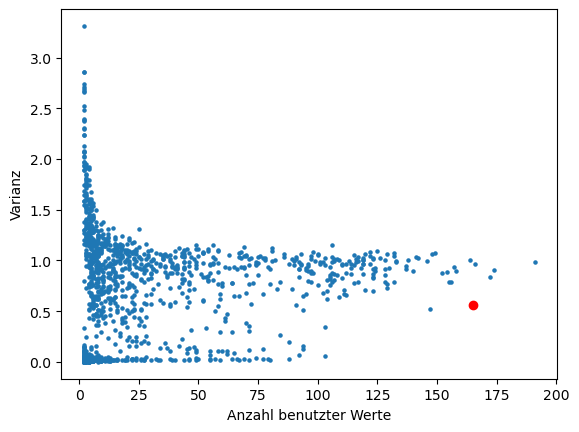

In [92]:
#nocmal für 4 muts

variance_per_mutant_4_list = []

for i in all_possible_mutations:
    mut_count_fscore_4 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_4_mut = mut_count_fscore_4['DMS_score'].loc[mut_count_fscore_4['mut_count'] == 4]
    varianz_mut_4 = fscore_4_mut.var()
    variance_per_mutant_4_list.append(varianz_mut_4)

variance_per_mutant_4_series = pd.Series(variance_per_mutant_4_list, index=all_possible_mutations)
variance_per_mutant_4_df = variance_per_mutant_4_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
how_many_for_variance_4 = []

for i in all_possible_mutations:
    mut_count_fscore_4 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_4_mut = mut_count_fscore_4['DMS_score'].loc[mut_count_fscore_4['mut_count'] == 4]
    wie_viel_jeweils_4 = len(fscore_4_mut)
    how_many_for_variance_4.append(wie_viel_jeweils_4)

how_many_for_variance_4 = pd.Series(how_many_for_variance_4, index=all_possible_mutations)
how_many_for_variance_4_df = how_many_for_variance_4.to_frame()


how_many_AND_variance_df_4 = pd.concat([how_many_for_variance_4_df, variance_per_mutant_4_df], axis = 1)
how_many_AND_variance_df_4.columns = ['Anzahl benutzter Werte', 'Varianz']
how_many_AND_variance_df_4 = how_many_AND_variance_df_4.dropna()
how_many_AND_variance_df_4

import matplotlib.pyplot as plt
#scatter plot erstellen, mit benennungen
plt.scatter(how_many_AND_variance_df_4['Anzahl benutzter Werte'],how_many_AND_variance_df_4['Varianz'], s = 5 )
plt.xlabel('Anzahl benutzter Werte')
plt.ylabel('Varianz')
#die angeblich highest gerankte mut in rot färben
plt.scatter(how_many_AND_variance_df_4['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df_4['Varianz']['V163A'], c='red')
# Diagramm anzeigen
plt.show()


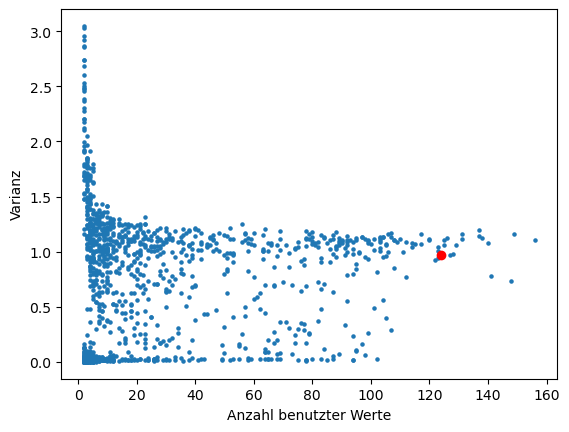

In [94]:
#für 5
variance_per_mutant_5_list = []

for i in all_possible_mutations:
    mut_count_fscore_5 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_5_mut = mut_count_fscore_5['DMS_score'].loc[mut_count_fscore_5['mut_count'] == 5]
    varianz_mut_5 = fscore_5_mut.var()
    variance_per_mutant_5_list.append(varianz_mut_5)

variance_per_mutant_5_series = pd.Series(variance_per_mutant_5_list, index=all_possible_mutations)
variance_per_mutant_5_df = variance_per_mutant_5_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
how_many_for_variance_5 = []

for i in all_possible_mutations:
    mut_count_fscore_5 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_5_mut = mut_count_fscore_5['DMS_score'].loc[mut_count_fscore_5['mut_count'] == 5]
    wie_viel_jeweils_5 = len(fscore_5_mut)
    how_many_for_variance_5.append(wie_viel_jeweils_5)

how_many_for_variance_5 = pd.Series(how_many_for_variance_5, index=all_possible_mutations)
how_many_for_variance_5_df = how_many_for_variance_5.to_frame()


how_many_AND_variance_df_5 = pd.concat([how_many_for_variance_5_df, variance_per_mutant_5_df], axis = 1)
how_many_AND_variance_df_5.columns = ['Anzahl benutzter Werte', 'Varianz']
how_many_AND_variance_df_5 = how_many_AND_variance_df_5.dropna()
how_many_AND_variance_df_3

import matplotlib.pyplot as plt
#scatter plot erstellen, mit benennungen
plt.scatter(how_many_AND_variance_df_5['Anzahl benutzter Werte'],how_many_AND_variance_df_5['Varianz'], s = 5 )
plt.xlabel('Anzahl benutzter Werte')
plt.ylabel('Varianz')
#die angeblich highest gerankte mut in rot färben
plt.scatter(how_many_AND_variance_df_5['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df_5['Varianz']['V163A'], c='red')
# Diagramm anzeigen
plt.show()


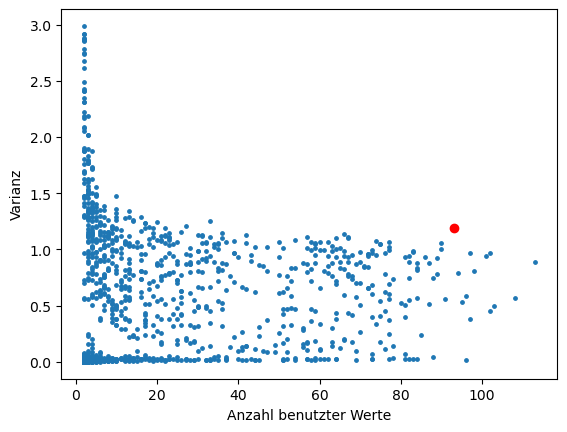

In [96]:
#für 6
variance_per_mutant_6_list = []

for i in all_possible_mutations:
    mut_count_fscore_6 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_6_mut = mut_count_fscore_6['DMS_score'].loc[mut_count_fscore_6['mut_count'] == 6]
    varianz_mut_6 = fscore_6_mut.var()
    variance_per_mutant_6_list.append(varianz_mut_6)

variance_per_mutant_6_series = pd.Series(variance_per_mutant_6_list, index=all_possible_mutations)
variance_per_mutant_6_df = variance_per_mutant_6_series.to_frame()


#rausfinden wie viele Daten wir jeweils haben zum berechnen
how_many_for_variance_6 = []

for i in all_possible_mutations:
    mut_count_fscore_6 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_6_mut = mut_count_fscore_6['DMS_score'].loc[mut_count_fscore_6['mut_count'] == 6]
    wie_viel_jeweils_6 = len(fscore_6_mut)
    how_many_for_variance_6.append(wie_viel_jeweils_6)

how_many_for_variance_6 = pd.Series(how_many_for_variance_6, index=all_possible_mutations)
how_many_for_variance_6_df = how_many_for_variance_6.to_frame()


how_many_AND_variance_df_6 = pd.concat([how_many_for_variance_6_df, variance_per_mutant_6_df], axis = 1)
how_many_AND_variance_df_6.columns = ['Anzahl benutzter Werte', 'Varianz']
how_many_AND_variance_df_6 = how_many_AND_variance_df_6.dropna()
how_many_AND_variance_df_3

import matplotlib.pyplot as plt
#scatter plot erstellen, mit benennungen
plt.scatter(how_many_AND_variance_df_6['Anzahl benutzter Werte'],how_many_AND_variance_df_6['Varianz'], s = 6 )
plt.xlabel('Anzahl benutzter Werte')
plt.ylabel('Varianz')
#die angeblich highest gerankte mut in rot färben
plt.scatter(how_many_AND_variance_df_6['Anzahl benutzter Werte']['V163A'],how_many_AND_variance_df_6['Varianz']['V163A'], c='red')
# Diagramm anzeigen
plt.show()


Following up:
1. welche mutation hat overall die geringste varianz + die meisten Werte? -> erstes ranking, welche am stabilisierendsten ist
2. Graph Anzahl der Mutationen gegen den fitness score je Mutation, Graph wie in dem einen paper
3. alle die Graphen in einen -> das was am meisten rechts ist -> zweites ranking
